<a href="https://colab.research.google.com/github/sidhu2690/422/blob/main/Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [161]:
import numpy as np

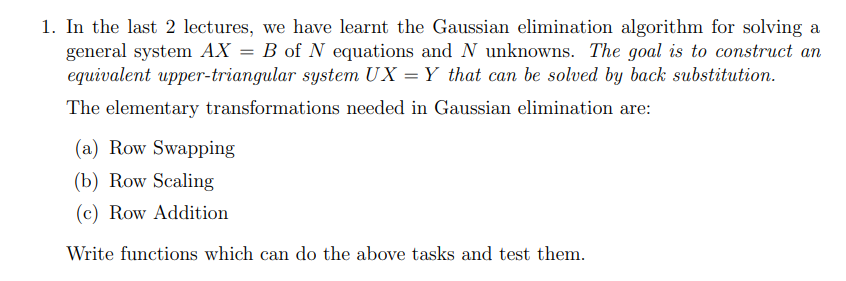

In [162]:
def row_swap(matrix, i, j):
  matrix = np.array(matrix)
  matrix[[i, j]] = matrix[[j, i]]
  return matrix


In [163]:
A = [[10, 20, 30],
     [40, 50, 60],
     [70, 80, 90]]

row_swap(A, 0, 2)

array([[70, 80, 90],
       [40, 50, 60],
       [10, 20, 30]])

In [164]:
def row_scale(matrix, i, alpha):
  matrix = np.array(matrix)
  matrix[i] *= alpha
  return matrix

In [165]:
A = [[10, 20, 30],
     [40, 50, 60],
     [70, 80, 90]]

row_scale(A, 0, 5)

array([[ 50, 100, 150],
       [ 40,  50,  60],
       [ 70,  80,  90]])

In [166]:
def row_add(matrix, i, j, alpha):
  matrix = np.array(matrix)
  matrix[i] = matrix[i] + alpha * matrix[j]
  return matrix

In [167]:
A = [[10, 20, 30],
     [40, 50, 60],
     [70, 80, 90]]

row_add(A, 0, 1, 5)

array([[210, 270, 330],
       [ 40,  50,  60],
       [ 70,  80,  90]])

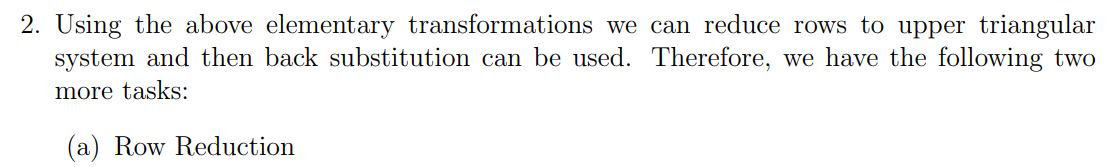

In [168]:
def row_reduction(matrix):
  matrix = np.array(matrix)
  n = len(matrix)


  for i in range(n):
    if matrix[i][i] == 0:
      for k in range(i+1, n):
        if matrix[k][i] != 0:
          matrix = row_swap(matrix, i, k)
          break

    for j in range(i+1, n):
      alpha = -1 * matrix[j][i] / matrix[i][i]
      matrix = row_add(matrix, j, i, alpha)

  return matrix.tolist()


In [169]:
matrix = [[2, 3, -1],
          [4, 1, 2 ],
          [-2, 5, 1]]

row_reduction(matrix)


[[2, 3, -1], [0, -5, 4], [0, 0, 6]]

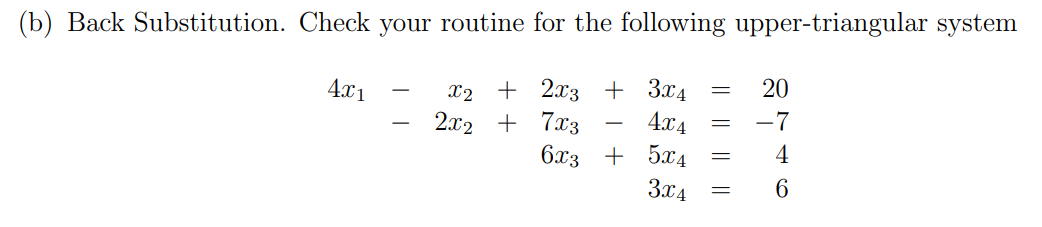

In [170]:
def back_substitution(matrix):
  n = len(matrix)
  x = [0] * n

  for i in range(n-1, -1, -1):
    sum_known = 0

    for j in range(i+1, n):
      sum_known += matrix[i][j] * x[j]

    x[i] = (matrix[i][-1] - sum_known)/ matrix[i][i]

  return x


In [171]:
matrix = [[4, -1, 2,  3,  20],
          [0, -2, 7, -4, -7 ],
          [0,  0, 6,  5,  4 ]]

back_substitution(matrix)

[6.125, 5.833333333333333, 0.6666666666666666]

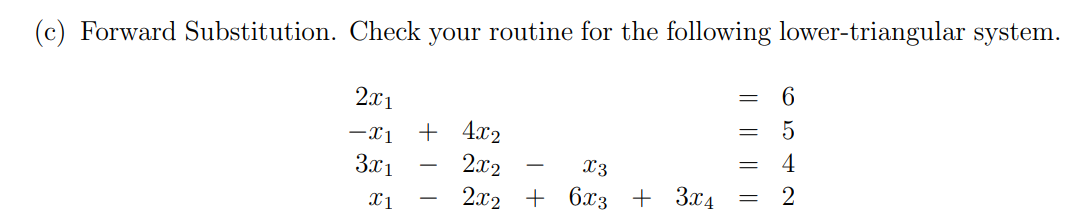

In [172]:
def forward_substitution(matrix):
  n = len(matrix)
  x = [0] * n

  for i in range(n):
    sum_known = 0

    for j in range(i):
      sum_known += matrix[i][j] * x[j]

    x[i] = (matrix[i][-1] -sum_known) / matrix[i][i]

  return x

In [173]:
A = [[ 2,  0,  0, 0, 6],
     [-1,  4,  0, 0, 5],
     [ 3, -2, -1, 0, 4],
     [ 1, -2,  6, 3, 2]]

forward_substitution(A)

[3.0, 2.0, 1.0, -1.0]

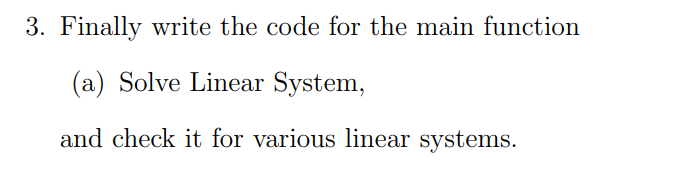

In [174]:
def solve_linear_system(matrix, triangular=None):
    matrix = np.array(matrix, dtype=float)

    if triangular == "upper":
        return back_substitution(matrix)
    elif triangular == "lower":
        return forward_substitution(matrix)
    else:
        row_reduced = row_reduction(matrix)
        return back_substitution(row_reduced)

In [175]:
matrix1 = [[2, 5, 0, -4, 6],
           [-4, -4, -3, 7, 36],
           [-6, -3, -7, -6, 35],
           [-1, 2, -6, 5, 63]]

A1 = np.array(matrix1)[:, :-1]
b1 = np.array(matrix1)[:, -1]
print("Custom solver:", solve_linear_system(matrix1))
print("NumPy solver: ", np.linalg.solve(A1, b1))

Custom solver: [-6.0, 6.0, -5.0, 3.0]
NumPy solver:  [-6.  6. -5.  3.]


In [176]:
matrix2 = [[3, 2, -4, 3],
           [2, 3, 3, 15],
           [5, -3, 1, 14]]

A2 = np.array(matrix2)[:, :-1]
b2 = np.array(matrix2)[:, -1]
print("Custom solver:", solve_linear_system(matrix2))
print("NumPy solver: ", np.linalg.solve(A2, b2))

Custom solver: [3.0000000000000013, 0.9999999999999996, 2.0000000000000004]
NumPy solver:  [3. 1. 2.]


In [177]:
matrix3 = [[1, 1, 1, 6],
           [0, 2, 5, -4],
           [2, 5, -1, 27]]
A3 = np.array(matrix3)[:, :-1]
b3 = np.array(matrix3)[:, -1]
print("Custom solver:", solve_linear_system(matrix3))
print("NumPy solver: ", np.linalg.solve(A3, b3))


Custom solver: [5.0, 3.0, -2.0]
NumPy solver:  [ 5.  3. -2.]


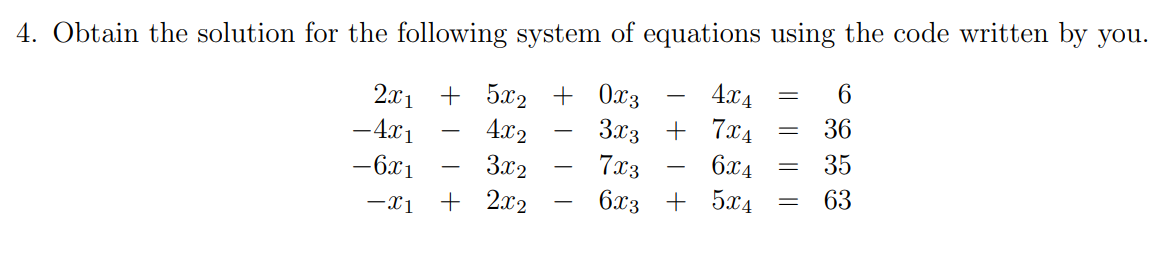

In [179]:
matrix=[[2, 5, 0, -4, 6],
        [-4, -4, -3, 7, 36],
        [-6, -3, -7, -6, 35],
        [-1, 2, -6, 5, 63]]

A = np.array(matrix)[:, :-1]
b = np.array(matrix)[:, -1]

custom_solution = solve_linear_system(matrix)

np_solution = np.linalg.solve(A, b)

print("Custom solver:", custom_solution)
print("NumPy solver: ", np_solution)


Custom solver: [-6.0, 6.0, -5.0, 3.0]
NumPy solver:  [-6.  6. -5.  3.]
